In [22]:
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt

# Convex optimization problems

## Optimization problems

\begin{align}
\text{minimize}  \; & f_0(x)      &     \\
\text{subject to}\; & f_i(x)\leq 0& i=1,\ldots,m \\
& h_i(x) =   0& i=1,\ldots,p
\label{eq:cvx_std_form}
\end{align}

The set of points for which the objective and all constraint functions are 

\begin{equation}
\mathcal{D} = \bigcap_{i=0}^m \mathbf{dom} f_i \cap
\bigcap_{i=1}^p \mathbf{dom}\;h_i
\end{equation}

and this is called the *domain* of the optimization problem.

### Feasibility and optimality

A point $x\in \mathcal{D}$ is *feasible* if it satisfies all the constraints, $f_i(x)\leq 0$ and $h_i(x)=0$. The set of all feasible points is called the *feasible set*.

The *optimal value* $p^*$ of the problem is defined as the set

\begin{equation}
p^* = \inf \left\{f_0(x) \mid f_i(x) \leq 0,\; i=1,\ldots,m,\; h_i(x) = 0,\;
i=1,\ldots,p\right\}.
\end{equation}

**Conventions for** $p^*$

- If the problem is unfeasible, we take $p^* = \infty$. (This is because of the convention that $\inf\left\{\emptyset\right\} = \infty$).
- If there is a sequence of feasible points $x_k$ such that $f_0(x_k)\to -\infty$, then $p^* = -\infty$, and we say
the problem is *unbounded below*.

Apparently, in risk-sensitive estimation, the technical name for $p^*=-\infty$ is called *euphoric breakdown*.


**Optimal and locally optimal points**

We say the point $x^*$ is an *optimal point* if $x^*$ is feasible and $f_0(x^*) = p^*$. That is, an optimal point is feasible and attains the optimal value. If an optimal point exists, we say the problem is *solvable*.

There can be more than one optimal point: the set of optimal points is called the *optimal set* and is denoted 

\begin{equation}
X_{opt} = \left\{x \mid f_i(x) \leq 0,\; i=1,\ldots,m\; h_i(x)=0,\; i=1,\ldots,p
\;f_0(x) = p^*\right\}
\end{equation}

A feasible point is *locally optimal* if there is an $R > 0$ such that 

\begin{equation}
f_0(x) = \inf\left\{f_0(z) \mid z \text{ feasible},\; \left\Vert z -x\right\Vert_{2}^{} \leq R\right\}.
\end{equation}

Loosely if $x$ is the best you can do in a ball of radius $R$, then $x$ is
locally optimal. 

*Examples*

What is the optimal set for each of the following, with $x\in \mathbf{R}^{}$ and $\mathbf{dom} f = \mathbf{R}^{}_{++}$?

- For $f_0(x) = 1/x$, the optimal value $p^* = 0$, but it is never achieved.
- For $f_0(x) = -\log x$, $p^* = -\infty$, and the problem is unbounded below
- For $f_0(x) = x\log x$, $p^* = -1/e$, which is achieved at the unique optimal point $x^*=1/e$.



### Unconstrained minimization

A problem is unconstrained if it has no explicit constraints ($m=p=0$).

*A simple example of an unconstrained problem with implicit constraints* 

consider the minimization problem

\begin{align}
\text{minimize}  \; & f_0(x) = -\sum_{i=1}^{k} \log\left(b_i-a_i^T x\right)
\end{align}

which has implicit constraints $a_i^T x < b_i$, because $\mathbf{dom} \log(u) $
is $\mathbf{R}^{n}_{++}$. It has no constraint functions, but there are implicit
constraints inherited from the domain of $f_0$.

### Feasibility problem

\begin{align}
\text{find}  \; & x      &     \\
\text{subject to}\; & f_i(x)\leq 0& i=1,\ldots,m \\
& h_i(x) =   0& i=1,\ldots,p
\end{align}

Any $x$ that satisfies the constraints is equally attractive.  The way to think about this is 

\begin{align}
\text{minimize}  \; & 0      &     \\
\text{subject to}\; & f_i(x)\leq 0& i=1,\ldots,m \\
& h_i(x) =   0& i=1,\ldots,p
\end{align}

which looks stupid, but encodes everything correctly. This way, there are two possibilities for $p^*$, either $p^* = 0$ if the contraints are feasible or $p^* = +\infty$ if constraints are infeasible. Any feasible point is optimal.

### Expressing problems in standard form

Equation (\ref{eq:cvx_std_form}) describes a problem in *standard form*. Sometimes, we need to do some massaging to get a problem into standard form.

### Equivalent problems

Giving a rigorous definition of an equivalent problem is complicated and unnecessary. Loosely, two problems are equivalent if we can the solution for one allows us to readily find the solution to the other.

>"If you can add a small wrapper code around one problem that provides the solution to the other, the problems are equivalent." - Stephen Boyd

This informal idea will be nonetheless completely clear when it arises. We can use change of variables, or transformation of objective and constraint functions to form equivalent problems that are easier to solve or transform a problem into standard form.

#### Transformation of objective and constraint functions 
*Example: Least-norm problems*

For the unconstrained Euclidean norm minimization problem

\begin{align}
\text{minimize}  \; & \left\Vert Ax - b\right\Vert_{2}
\label{eq:un_euc}
\end{align}

for $x\in \mathbf{R}^{n}$. Since the norm is always positive, we can just as well minimize the square of the norm, solving the problem

\begin{align}
\text{minimize}  \; & \left\Vert Ax - b\right\Vert_{2}^2 = (Ax -b)^T(Ax - b)
\label{eq:un_euc2}
\end{align}

These problems are equivalent: their optimal points are the same. But the problems are not the same. The objective function in equation (\ref{eq:un_euc}) is not differentiable at any $x$ where $Ax - b = 0$, but the objective function in equation (\ref{eq:un_euc2}) is differentiable everywhere and has a nice quadratic form.




#### Zeroing the right-hand side

If the contraint functions have nonzero righ hand-sides, just subtract.

\begin{align}
\text{minimize}  \; & f_0(x)      &     \\
\text{subject to}\; & f_i(x)\leq \tilde{f}_i(x)& i=1,\ldots,m \\
& h_i(x) =  \tilde{h}_i(x) & i=1,\ldots,p
\end{align}
gets rewritten as
\begin{align}
\text{minimize}  \; & f_0(x)      &     \\
\text{subject to}\; & f_i(x) - \tilde{f}_i(x) \leq 0 & i=1,\ldots,m \\
& h_i(x) - \tilde{h}_i(x) =0 & i=1,\ldots,p
\end{align}

*Example: Box constraints*

For problems where each $x_i$ is subject to upper and lower bounds,

\begin{align}
\text{minimize}  \; & f_0(x)      &     \\
\text{subject to}\; & l_i \leq x_i\leq u_i & i=1,\ldots,n
\end{align}

we split each of the constraints up, resulting in $2n$ constraints

\begin{align}
\text{minimize}  \; & f_0(x)      &     \\
\text{subject to}\; & l_i - x_i \leq 0 & i=1,\ldots,n \\
& x_i - u_i \leq 0 & i=1,\ldots,n
\end{align}

#### Maximization problems

Standard form by convention assumes a minimization problem.

\begin{align}
\text{maximize}  \; & f_0(x)      &     \\
\text{subject to}\; & f_i(x)\leq 0& i=1,\ldots,m \\
& h_i(x) =   0& i=1,\ldots,p
\end{align}

So we just minimize the function $-f_0$ subject to the constraints and we're
done.

#### Eliminating inequalities with slack variables

The idea behind slack variables is that we have the constraint $f_i(x) \leq 0$ if and only if 

\begin{equation}
\text{there exists } s_i \geq \qquad \text{such that } f_i(x) + s_i = 0.
\end{equation}

So we can replace the standard problem with 

\begin{align}
\text{minimize}  \; & f_0(x)      &     \\
\text{subject to}\; & s_i(x)\geq 0& i=1,\ldots,m \\
& f_i(x) +s_i = 0  & i=1,\ldots,m \\
& h_i(x) =   0& i=1,\ldots,p
\end{align}

This new problem has $x\in \mathbf{R}^{n}$ and $s\in \mathbf{R}^{m}$, so there are $n+m$ variables. There are $m$ inequality constraints ensuring $s_i \geq 0 $, and $m+p$ equality constraints.

So for the price of increasing the problem size, we've replaced the inequality constraints with equality constraints and adds simple nonnegativity equality constraints.

#### Eliminating linear equality constraints

Notes:
- eliminate $Ax = b$ by finding $F$ and a point $z$ such that $x = Fz + x_0$ where $x_0$ is a particular solution (can take least norm solution) of $Ax=b$. Then for any value of $z$,

$$A(Fz + x_0) = b $$ for all $z$, automatically. So we don't need the constraint anymore. Then we can form the equivalent problem. The price we pay is the modest computation to calculate $F$ and $x_0$.

#### Introducing equality constraints

It's actually in many cases easier to solve a problem with more variables. Sounds odd, but it's true.

Example:
some math

This does not look like progress, but weirdly, later we will see that this is the first step to lots of progress.

#### Optimizing over some variables
#### Epigraph problem form

## Convex optimization

Convex optimization problems have additional restrictions compared to the general optimization problem expressed in
equation (\ref{eq:cvx_std_form})

\begin{align}
\text{minimize}  \; & f_0(x)      &     \\
\text{subject to}\; & f_i(x)\leq 0& i=1,\ldots,m \\
& a_i^T x =   b_i & i=1,\ldots,p,
\label{eq:cvx_problem_std}
\end{align}

where the objective function $f_0(x)$ as well as all of the inequality
constraint functions $f_i(x)$ are convex functions. The equality constraint
functions must be affine.

We have implicitly that the feasible set of convex optimization problem is
convex, since it is the intersection of the domain of the problem

\begin{equation}
\mathcal{D} = \bigcap_{i=0}^m \mathbf{dom} f_i,
\end{equation}

which is a convex set since it is the intersection of finitely many convex sets.

### Abstract form of a convex optimization problem

Some references define a convex optimization problem to be any problem in which we minimize a convex function over a convex set. However, in the Boyd book, they don't accept this; a convex problem must explicitly be expressed in terms of convex / affine constraint functions. 

To illustrate the distinction between the two conventions, consider the cooked-up problem in the Boyd notes

\begin{align}
\text{minimize}  \; & x_1^2 = x_2^2     \\
\text{subject to}\; & x_1/(1+x_2^2) \leq 0 \\
& (x_1 + x_2)^2  = 0
\end{align}

The two constraints do describe a convex feasible set.  However, In the Boyd
convention, this is **not** a convex problem since neither the inequality
constraint nor the equality constraint is convex. 

However, the constraints are readily transformed into convex ones. We have that $x_1/(1+x_2^2)\leq 0 \iff x_1 \leq 0$ and $(x_1+x_2)^2 =0 \iff x_1 +
x_2 = 0$, both of which are convex. So, the problem is equivalent to a convex
problem.

### Local and global optima

A fundamental property of convex optimization problems is that any locally optimal point is also globally optimal if $x$ is feasible. This relies on the convexity of the function and the domain.

### Optimality criterion for differentiable $f_0$

#### Unconstrained problems


#### Problems with only equality constraints

#### Minimization over the nonnegative orthant

### Quasiconvex optimization

## Linear optimization problems


## Quadratic optimization problems

## Geometric programming

## Generalized inequality constraints

## Vector optimization

## Exercises

Boyd 4.1

Consider the optimization problem

\begin{align*}
\text{minimize}  \;\; & f_0(x1,x2)      &     \\
\text{subject to}\;\; & 2x_1+x_2 \geq 1 & \\
& x_1 + 3x_2 \geq 1 & \\
& x_1 \geq 0 & \\
& x_2 \geq 0 & \\
\end{align*}


Make a sketch of the feasible set. For each of the objective functions, give the optimal set and optimal value.

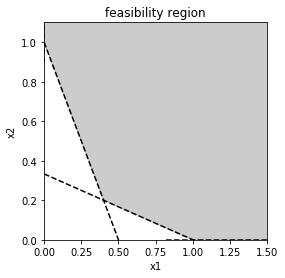

In [92]:
x1 = np.linspace(0,1.6,50)
upper = 2*np.ones_like(x1) # x2 > 0 
f1 = 1 - 2*x1
f2 = (1-x1)/3
f3 = 0*x1
lower = np.maximum(np.maximum(f1, f2), f3)
fig = plt.figure(figsize=(4,4))
plt.plot(x1, f1, 'k--'); 
plt.plot(x1, f2, 'k--')
plt.plot(x1[25:], np.zeros_like(x1)[25:], 'k--'); 
plt.plot(np.zeros(50), np.linspace(0.9,2),'k--')
plt.fill_between(x1, lower, upper, color='grey', alpha=0.4)
plt.xlabel('x1'); plt.ylabel('x2'); plt.ylim(0,1.1); plt.xlim(-0.0,1.5)
plt.title('feasibility region'); plt.show()

The feasibility region is the convex hull of $(0,\infty)$, (0,1), (2/5,1/5), (1,0), and $(\infty, 0)$

(a) $f_0(x_1,x_2) = x_1 + x_2$

We need only check the corners since the function is linear. By inspection, the optimal value is $p^*=3/5$ on the optimal set $x^*=(2/5,1/5)$, any other point and $p^*$ increases.

(b) $f_0(x_1,x_2) = -x_1 - x_2$

This objective function is unbounded below.

(c) $f_0(x_1,x_2) = x_1$

The smallest $x_1$ can get is $p^*=0$ on the optimal set $x^* = \{x\mid x_1=0, x_2=[1, \infty)\}$

(d) $f_0(x_1,x_2) = \max\left\{x_1,x_2\right\}$

Drawing the line $x_1 = x_2$ and inspecting the the region on each side of the line, the minimum is obtained at $x^* = (1/3,1/3)$ and $p^*=1/3$.

(e) $f_0(x_1,x_2) = x_1^2 + 9x_2^2$

We have to consider the boundary of the region